# Authors:
<div style="color: red;">
Farah Kamran <br>
Rehan Khalil <br>
Muhammad Junaid Raza, 2409917

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, chi2_contingency, kruskal 

# 1: Data Preparation

### Step 1: Loading the dataset

In [2]:
df = pd.read_csv(r'habits.data', sep=';', na_values=['?'], index_col=False, header=0)

In [3]:
df

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V7,V21,...,V40,V68,V69,V70,V75,H1a_A,H1b_A,H1g_A,H1h_A,H1i_A
0,50007,2,2,2,3.0,6,580,0,20,0,...,0,30,0,0,0,1.0,1.0,2.0,1.0,2.0
1,50009,1,1,2,1.0,7,0,40,0,0,...,0,240,0,60,0,1.0,1.0,2.0,1.0,1.0
2,50015,1,1,1,3.0,8,0,10,0,0,...,0,310,10,240,0,2.0,1.0,2.0,1.0,2.0
3,50032,2,1,1,2.0,8,0,0,10,0,...,0,0,0,170,0,2.0,2.0,2.0,2.0,2.0
4,50033,1,1,2,1.0,8,00:00,02:10,00:20,00:00,...,00:00,00:30,00:00,01:50,00:00,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,1.0,4,440,30,10,0,...,0,10,0,80,0,1.0,1.0,1.0,2.0,1.0
389,51947,2,1,2,1.0,7,490,0,10,0,...,0,0,0,70,10,1.0,1.0,2.0,1.0,2.0
390,51956,1,1,2,2.0,6,0,30,0,0,...,0,30,0,170,50,1.0,1.0,2.0,1.0,2.0
391,51957,2,2,2,1.0,7,0,10,10,0,...,0,60,0,30,40,2.0,2.0,1.0,1.0,2.0


### Step 2: Selecting the relevant columns

In [4]:
columns_to_use = ['kohde', 'jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V22', 'V32', 'V75', 'H1b_A', 'H1i_A']
df_with_selected_columns = df[columns_to_use]

In [5]:
df_with_selected_columns

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V22,V32,V75,H1b_A,H1i_A
0,50007,2,2,2,6,3.0,580,0,430,0,1.0,2.0
1,50009,1,1,2,7,1.0,0,0,560,0,1.0,1.0
2,50015,1,1,1,8,3.0,0,0,450,0,1.0,2.0
3,50032,2,1,1,8,2.0,0,0,530,0,2.0,2.0
4,50033,1,1,2,8,1.0,00:00,00:00,07:20,00:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,4,1.0,440,0,460,0,1.0,1.0
389,51947,2,1,2,7,1.0,490,0,470,10,1.0,2.0
390,51956,1,1,2,6,2.0,0,0,NaN,50,1.0,2.0
391,51957,2,2,2,7,1.0,0,0,740,40,2.0,2.0


### Step 3: Creating copy for final_df to prevent original column rename warning

In [6]:
final_df = df_with_selected_columns.copy()

### Step 4: Renaming columns for better readability

In [7]:
final_df.rename(columns={
    'kohde': 'Household_ID',
    'jasen': 'Member_ID',
    'pvknro': 'Day_of_Week',
    'sp': 'Sex',
    'IKAL1': 'Age_Group',
    'ASALUE': 'Living_Environment',
    'V1': 'Working',
    'V22': 'Reading_and_Playing_with_Children',
    'V32': 'Sleeping',
    'V75': 'Phonecall',
    'H1b_A': 'Theater',
    'H1i_A': 'Sport_Event',
}, inplace=True)

In [8]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,2,2,6,3.0,580,0,430,0,1.0,2.0
1,50009,1,1,2,7,1.0,0,0,560,0,1.0,1.0
2,50015,1,1,1,8,3.0,0,0,450,0,1.0,2.0
3,50032,2,1,1,8,2.0,0,0,530,0,2.0,2.0
4,50033,1,1,2,8,1.0,00:00,00:00,07:20,00:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,4,1.0,440,0,460,0,1.0,1.0
389,51947,2,1,2,7,1.0,490,0,470,10,1.0,2.0
390,51956,1,1,2,6,2.0,0,0,NaN,50,1.0,2.0
391,51957,2,2,2,7,1.0,0,0,740,40,2.0,2.0


### Step 5: Checking the initial data types to understand what needs to be changed


In [9]:
print(final_df.dtypes)

Household_ID                           int64
Member_ID                              int64
Day_of_Week                            int64
Sex                                    int64
Age_Group                              int64
Living_Environment                   float64
Working                               object
Reading_and_Playing_with_Children     object
Sleeping                              object
Phonecall                             object
Theater                              float64
Sport_Event                          float64
dtype: object


### Step 6: Converting columns to categorical

In [10]:
final_df['Day_of_Week'] = pd.Categorical(final_df['Day_of_Week']).rename_categories({1: 'Working Day', 2: 'Weekend'})

final_df['Living_Environment'] = pd.Categorical(final_df['Living_Environment']).rename_categories({1: 'City', 2: 'Municipality', 3: 'Rural Area'})

final_df['Sex'] = pd.Categorical(final_df['Sex']).rename_categories({1: 'Male', 2: 'Female'})

final_df['Theater'] = pd.Categorical(final_df['Theater']).rename_categories({1: 'Yes', 2: 'No'})

final_df['Sport_Event'] = pd.Categorical(final_df['Sport_Event']).rename_categories({1: 'Yes', 2: 'No'})

final_df['Age_Group'] = pd.Categorical(final_df['Age_Group']).rename_categories({
    1: '10-14 ',
    2: '15-19 ',
    3: '20-24 ',
    4: '25-34 ',
    5: '35-44 ',
    6: '45-54 ',
    7: '55-64 ',
    8: '65-74 ',
    9: '75+ '
})

In [11]:
final_df.dtypes

Household_ID                            int64
Member_ID                               int64
Day_of_Week                          category
Sex                                  category
Age_Group                            category
Living_Environment                   category
Working                                object
Reading_and_Playing_with_Children      object
Sleeping                               object
Phonecall                              object
Theater                              category
Sport_Event                          category
dtype: object

### Step 7: Checking missing values

In [12]:
print(final_df.isnull().sum())

Household_ID                          0
Member_ID                             0
Day_of_Week                           0
Sex                                   0
Age_Group                             0
Living_Environment                    1
Working                               2
Reading_and_Playing_with_Children     2
Sleeping                              5
Phonecall                             7
Theater                              26
Sport_Event                          25
dtype: int64


### Step 8: Imputing categorical columns with the mode (most frequent value)

In [13]:
categorical_columns = ['Living_Environment', 'Theater', 'Sport_Event']
for col in categorical_columns:
    mode_value = final_df[col].mode()[0]
    final_df[col] = final_df[col].fillna(mode_value)

### Step 9: Imputing continuous columns with 0

<div style="color: red;">
Explanation for imputing missing values:<br>
For the object data types such as "Working", "Reading_and_Playing_with_Children", "Sleeping", and "Phonecall", we are filling missing values with 0, assuming that no activity occurred during that time. This assumption is based on the idea that if there is no recorded time for an activity, it likely means the activity was not performed. This approach was considered because it makes sense in the context of time-based data, for like mean or median imputation it could be more appropriate for other columns where missing values might not be as straightforward.

In [14]:
continuous_columns = ['Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']
for col in continuous_columns:
    final_df[col] = final_df[col].fillna('0')


### Step 10: Verifying if missing values are handled or not

In [15]:
print(final_df.isnull().sum())

Household_ID                         0
Member_ID                            0
Day_of_Week                          0
Sex                                  0
Age_Group                            0
Living_Environment                   0
Working                              0
Reading_and_Playing_with_Children    0
Sleeping                             0
Phonecall                            0
Theater                              0
Sport_Event                          0
dtype: int64


##### As per the instruction about `Working`, `Reading_and_Playing_with_Children`, `Sleeping`, and `Phonecall` columns they represent time in minutes. While in dataset some rows have the `hh:mm` format. Therefore, I implemented a function that converts time from `hh:mm` format to total minutes.

In [16]:
def convert_to_minutes(time_str):
    # If the value is numeric (int or float), return as it is
    if isinstance(time_str, (int, float)):
        return time_str
    # If the value is a string, try to convert it to a number
    elif isinstance(time_str, str):
        # If it's a valid numeric string, return it as an integer (e.g., "580" -> 580)
        if time_str.isdigit():
            return int(time_str)
        # If it's in 'hh:mm' format, convert to minutes
        elif ':' in time_str:
            try:
                hours, minutes = map(int, time_str.split(':'))
                return hours * 60 + minutes
            except ValueError:
                return 0  # Invalid time format, return 0
    # Return 0 for any other invalid values (like NaN or non-numeric strings)
    return 0

# Apply the function to the relevant columns
final_df['Working'] = final_df['Working'].apply(lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)
final_df['Reading_and_Playing_with_Children'] = final_df['Reading_and_Playing_with_Children'].apply(lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)
final_df['Sleeping'] = final_df['Sleeping'].apply(lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)
final_df['Phonecall'] = final_df['Phonecall'].apply(lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)

In [17]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,Weekend,Female,45-54,Rural Area,580,0,430,0,Yes,No
1,50009,1,Working Day,Female,55-64,City,0,0,560,0,Yes,Yes
2,50015,1,Working Day,Male,65-74,Rural Area,0,0,450,0,Yes,No
3,50032,2,Working Day,Male,65-74,Municipality,0,0,530,0,No,No
4,50033,1,Working Day,Female,65-74,City,0,0,440,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,Weekend,Female,25-34,City,440,0,460,0,Yes,Yes
389,51947,2,Working Day,Female,55-64,City,490,0,470,10,Yes,No
390,51956,1,Working Day,Female,45-54,Municipality,0,0,0,50,Yes,No
391,51957,2,Weekend,Female,55-64,City,0,0,740,40,No,No


In [18]:
# Check if there are any duplicates in the DataFrame
duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Step 11: Histograms for continuous variables (e.g., Working, Reading_and_Playing_with_Children, Sleeping, Phonecall)

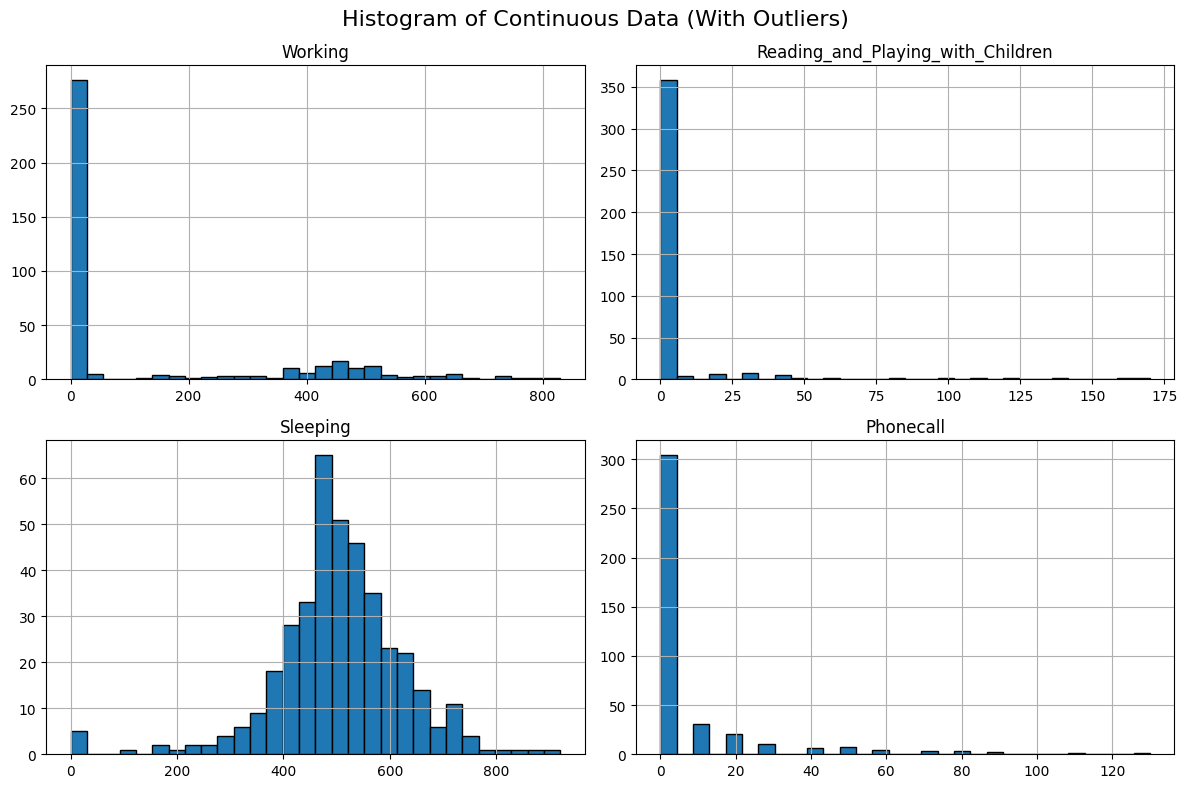

In [19]:
# Plot histograms for continuous columns
final_df[continuous_columns].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histogram of Continuous Data (With Outliers)", fontsize=16)
plt.tight_layout()
plt.show()

### Step 12:  Creating boxplot for continuous variables (e.g., Working, Reading_and_Playing_with_Children, Sleeping, Phonecall)

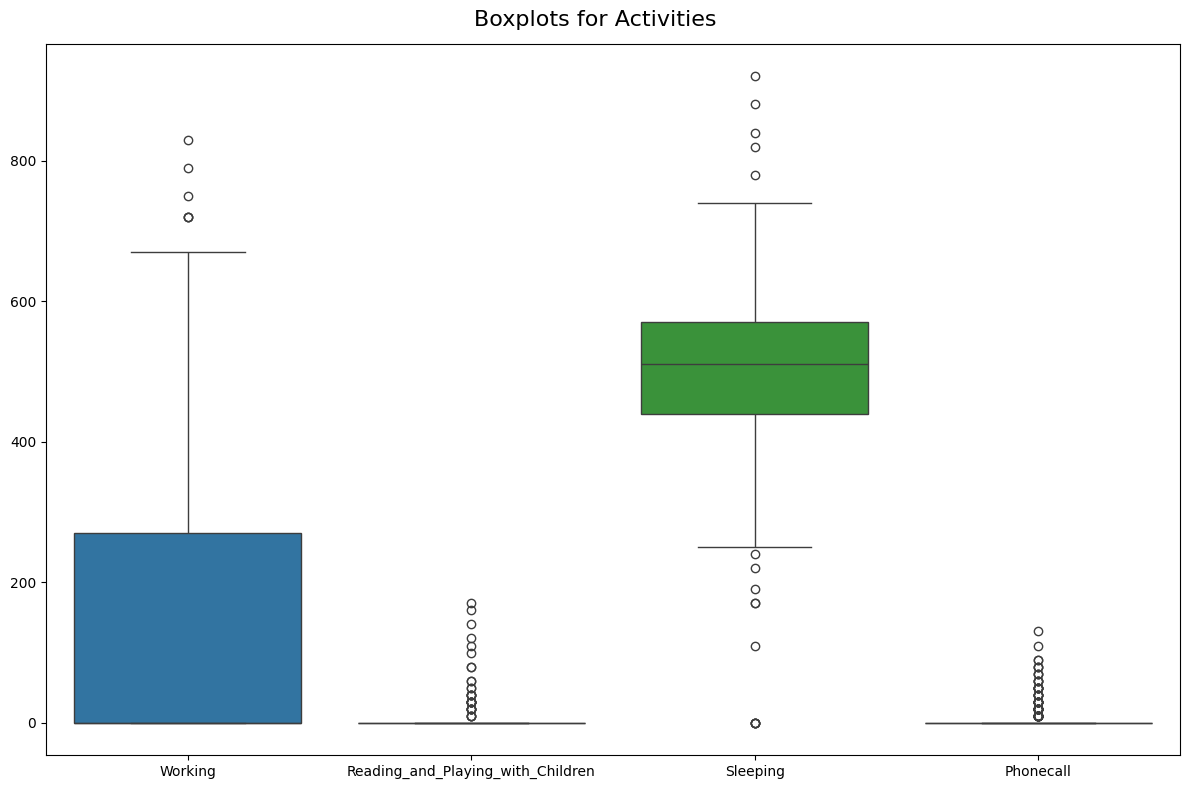

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df[continuous_columns])
plt.suptitle("Boxplots for Activities", fontsize=16)
plt.tight_layout()
plt.show()

### Step 13: Bar charts for categorical variables (Day_of_Week, Sex, Age_Group, Living_Environment, Theater, Sport_Event)

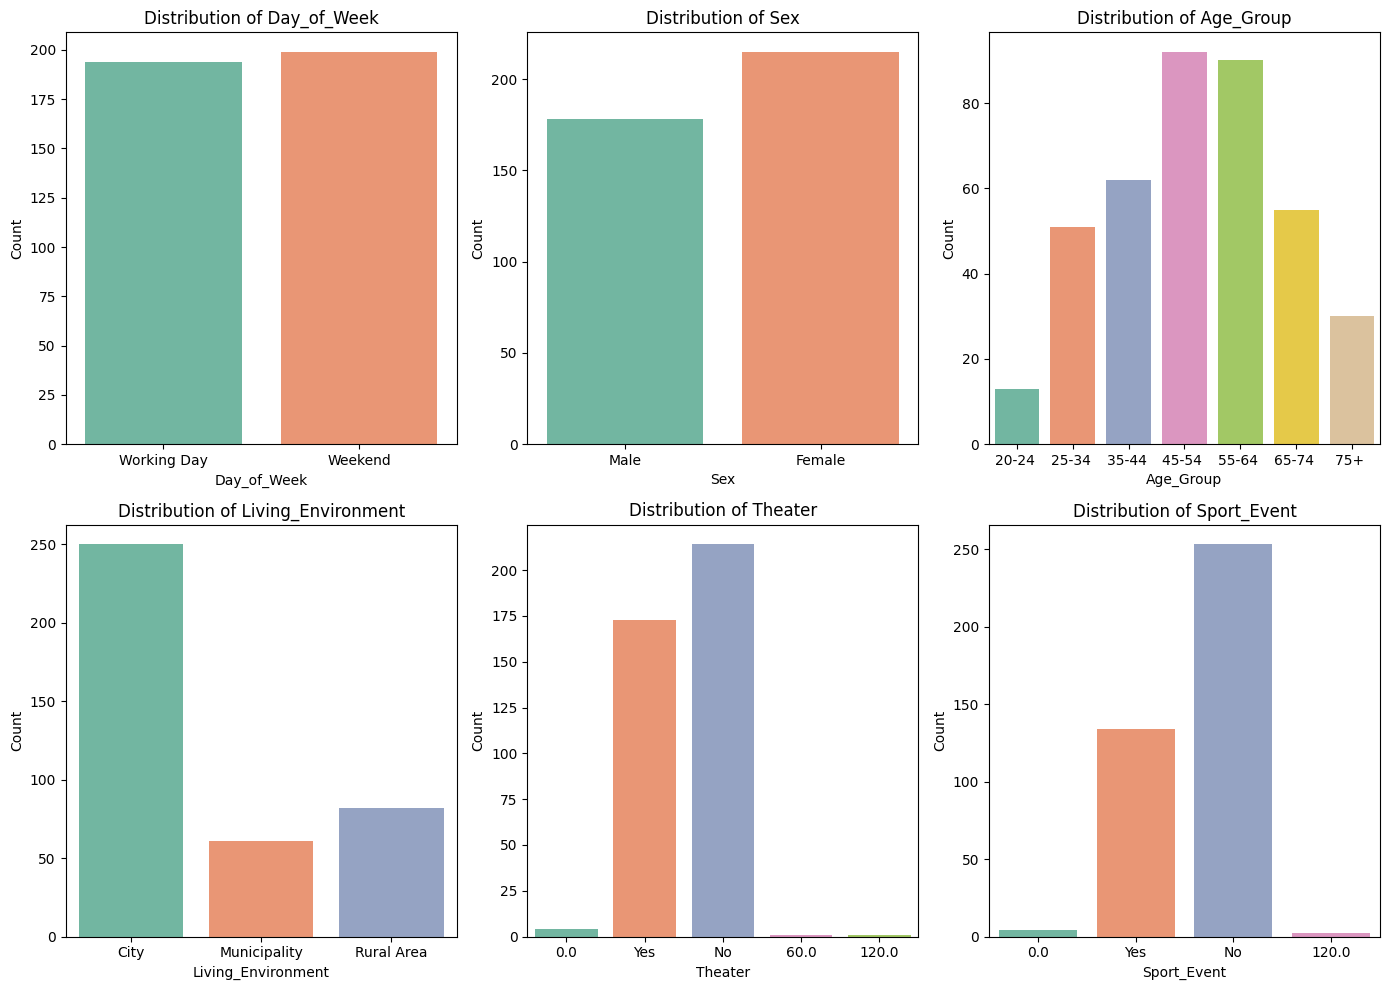

In [21]:
categorical_columns = ['Day_of_Week', 'Sex', 'Age_Group', 'Living_Environment', 'Theater', 'Sport_Event']

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=final_df[column], hue=final_df[column], palette="Set2", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="color: red;">
In the above box plot, we can observe that the 'Theater' and 'Sport_Event' columns contain some outlier values, specifically 0.0, 60.0, and 120.0, which appear as extreme points on the plot. These values stand out from the rest of the data, suggesting that they may not accurately represent meaningful entries. The box plot visually highlights these anomalies, indicating that they likely result from data entry errors or other inconsistencies, which could affect the overall analysis and interpretation of these variables.

### Step 14: Droping rows with invalid numerical values in 'Theater' and 'Sport_Event' (0.0, 60.0, 120.0) & (0.0,120.0)

In [22]:
final_df = final_df[~final_df['Theater'].isin([0.0, 60.0, 120.0])]
final_df = final_df[~final_df['Sport_Event'].isin([0.0, 120.0])]

### Step 15: Removing invalid categories of 'Theater' and 'Sport_Event'

In [23]:
final_df['Theater'] = final_df['Theater'].cat.remove_categories([0.0, 60.0, 120.0])
final_df['Sport_Event'] = final_df['Sport_Event'].cat.remove_categories([0.0, 120.0])

### Step 16: Checking unique values after dropping invalid categories

In [24]:
print(final_df['Theater'].unique())
print(final_df['Sport_Event'].unique())

['Yes', 'No']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


<div style="color: red;">
I removed the rows with invalid numerical values in the 'Theater' and 'Sport_Event' columns (specifically 0.0, 60.0, and 120.0) because these values do not seem to represent valid or meaningful information in the context of the dataset. The presence of such values likely indicates data entry errors or anomalies that could distort the analysis and lead to inaccurate conclusions. By excluding these invalid entries, I ensure that the dataset accurately reflects the intended values for these columns and maintain the integrity of the analysis moving forward.

### Step 17: Plotting Bar charts again for categorical variables (Day_of_Week, Sex, Age_Group, Living_Environment, Theater, Sport_Event)

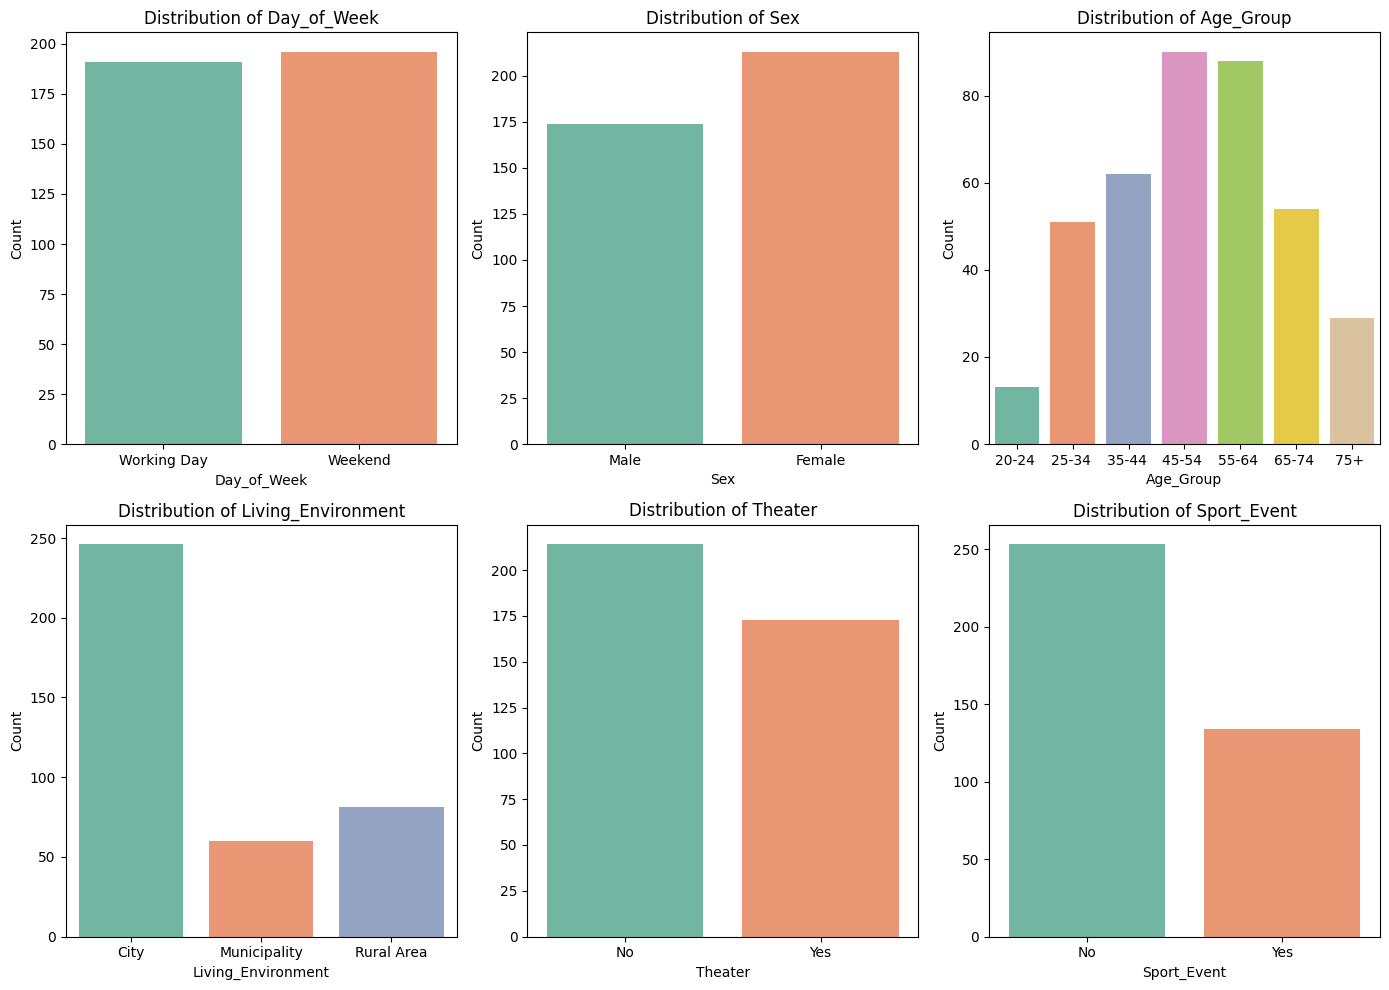

In [25]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=final_df[column], hue=final_df[column], palette="Set2", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2: Use of descriptive statistics	

### Step 1: Selecting only numeric columns

In [26]:
numeric_columns = ['Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']

<div style="color: red;">
Since Household_ID and Member_ID both are identifiers so we will exclude these to and perform the normality testing on all the other columns with numeric type to see if the data is normally distributed or not. Based on the results of the tests, we will identify which statistical tests to opt for.

### Step 2: Descriptive statistics for numeric columns

In [27]:
final_df[numeric_columns].describe()

,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall
count,387.000000,387.000000,387.000000,387.000000
mean,126.279070,4.599483,504.754522,6.925065
std,215.992959,19.409209,123.502970,17.722737
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,440.000000,0.000000
50%,0.000000,0.000000,510.000000,0.000000
75%,250.000000,0.000000,570.000000,0.000000
max,830.000000,170.000000,920.000000,130.000000


### Step 3: Calculating skewness for numeric columns

In [28]:
final_df[numeric_columns].skew()


Working                              1.366545
Reading_and_Playing_with_Children    5.720520
Sleeping                            -0.731501
Phonecall                            3.490187
dtype: float64

### Step 4: Calculating kurtosis for numeric columns

In [29]:
final_df[numeric_columns].kurt()

Working                               0.362796
Reading_and_Playing_with_Children    36.932001
Sleeping                              3.349116
Phonecall                            13.978319
dtype: float64

### Step 5: For categorical columns, summarize their distribution

In [30]:
categorical_columns = ['Living_Environment', 'Theater', 'Sport_Event']
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(final_df[col].value_counts())
    print()

Value counts for Living_Environment:
Living_Environment
City            246
Rural Area       81
Municipality     60
Name: count, dtype: int64

Value counts for Theater:
Theater
No     214
Yes    173
Name: count, dtype: int64

Value counts for Sport_Event:
Sport_Event
No     253
Yes    134
Name: count, dtype: int64



# 3: Use of estimation and statistical tests

### Step 1: Estimating Central Tendency and Dispersion

In [31]:
central_tendency_dispersion = final_df[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])
central_tendency_dispersion

,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall
mean,126.279070,4.599483,504.754522,6.925065
median,0.000000,0.000000,510.000000,0.000000
std,215.992959,19.409209,123.502970,17.722737
min,0.000000,0.000000,0.000000,0.000000
max,830.000000,170.000000,920.000000,130.000000
quantile,0.000000,0.000000,510.000000,0.000000


### Step 2: Confidence Intervals (Estimation)

In [38]:
# 95% confidence interval for 'Working' column
working_data = final_df['Working']
mean_working = np.mean(working_data)
std_working = np.std(working_data, ddof=1)
n = len(working_data)

# Standard error of the mean
sem = std_working / np.sqrt(n)

# Confidence interval
confidence_interval = stats.t.interval(0.95, n-1, loc=mean_working, scale=sem)
print("95% Confidence Interval for 'Working' column:", confidence_interval)

95% Confidence Interval for 'Working' column: (np.float64(104.6918821861646), np.float64(147.8662573487191))


### Step 3: Check Normality of Numerical Variables

#### Step 3.1: Descriptive Statistics for Numerical Variables

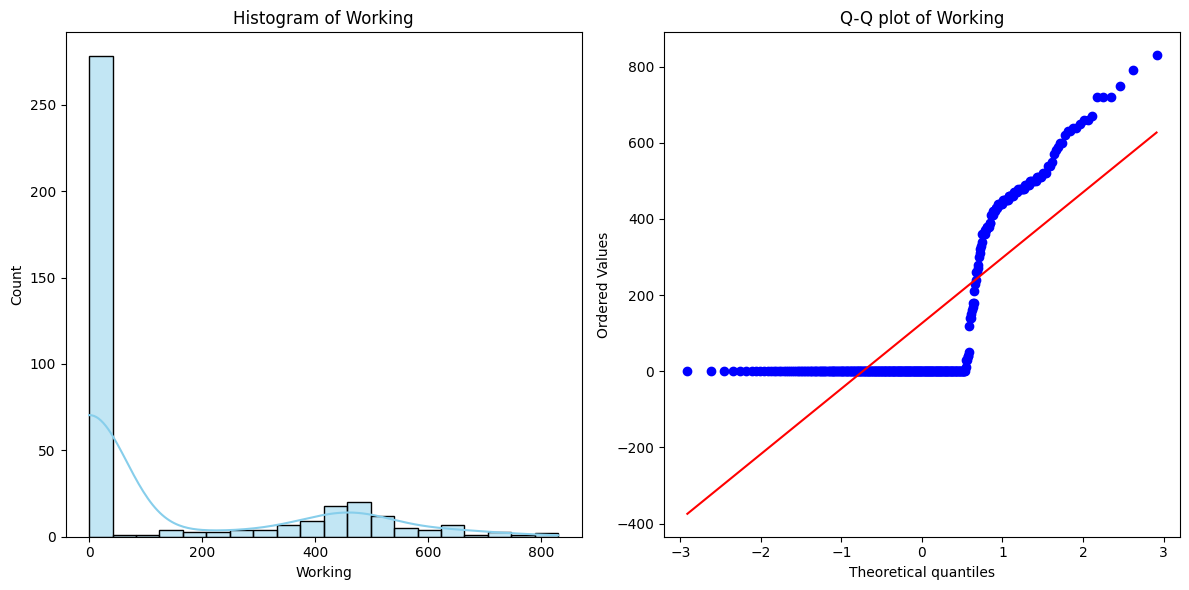

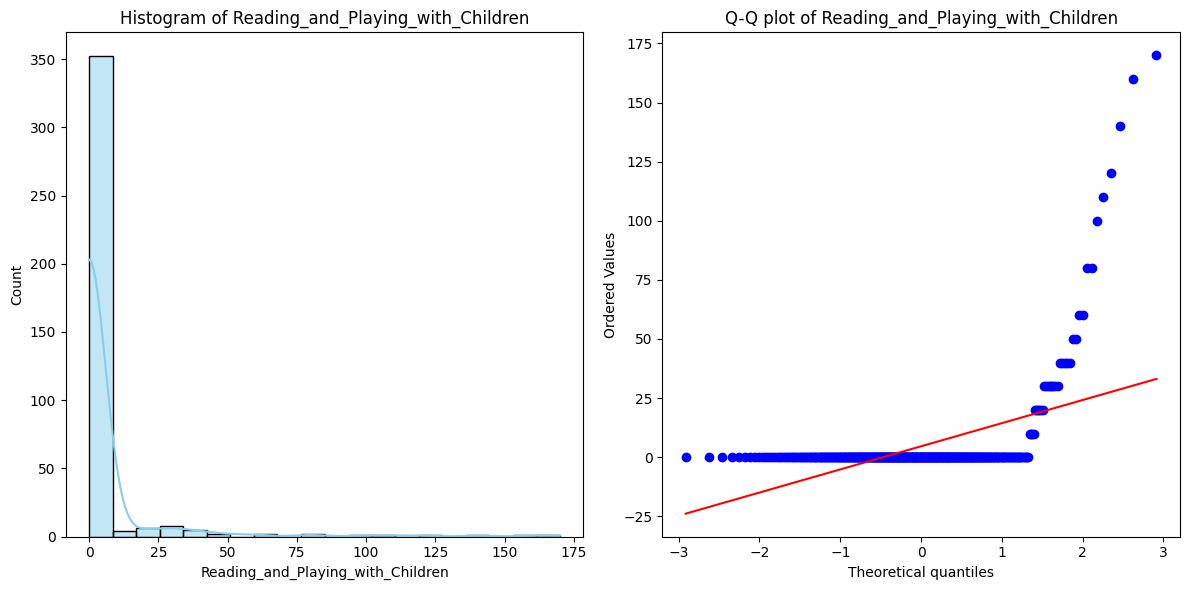

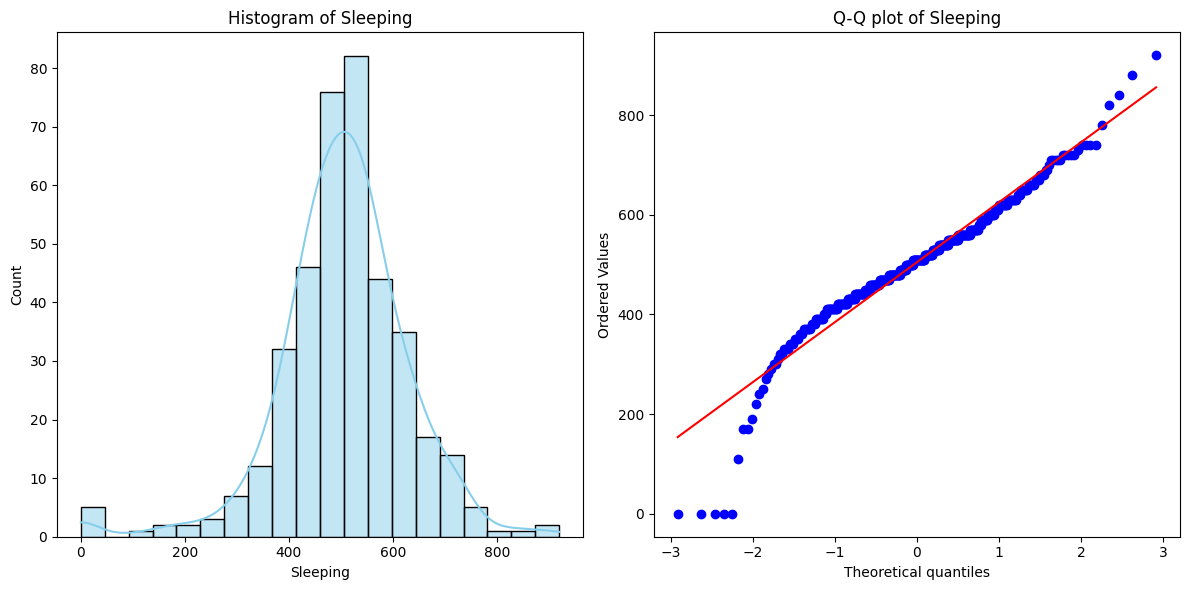

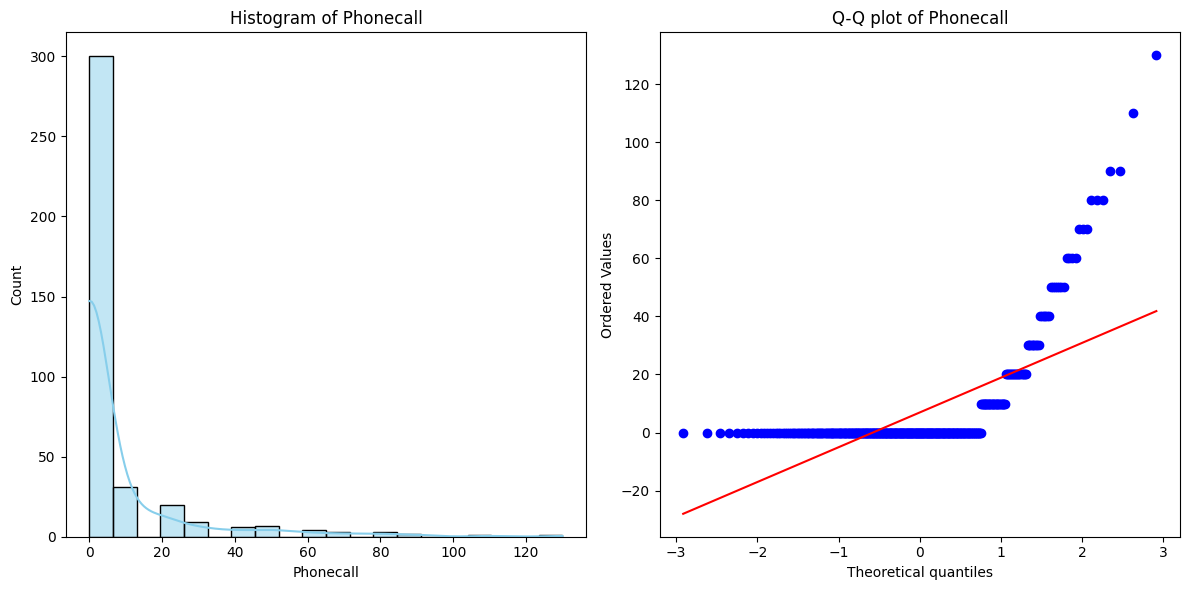

In [33]:
# Visualizing the distribution with histograms and Q-Q plots for each numerical variable
for col in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(final_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(final_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')

    plt.tight_layout()
    plt.show()

#### Step 3.2: Shapiro-Wilk test for normality on numerical variables 

##### Checking normality of numerical variables and visualize the results with a histogram. 

In [39]:
for col in numeric_columns:
    stat, p_value = shapiro(final_df[col].dropna())
    print(f"Shapiro-Wilk Test for {col}: stat={stat:.2f}, p-value={p_value:.2f}")
    if p_value > 0.05:
        print(f"{col} follows a normal distribution.")
    else:
        print(f"{col} does NOT follow a normal distribution.")

Shapiro-Wilk Test for Working: stat=0.63, p-value=0.00
Working does NOT follow a normal distribution.
Shapiro-Wilk Test for Reading_and_Playing_with_Children: stat=0.26, p-value=0.00
Reading_and_Playing_with_Children does NOT follow a normal distribution.
Shapiro-Wilk Test for Sleeping: stat=0.94, p-value=0.00
Sleeping does NOT follow a normal distribution.
Shapiro-Wilk Test for Phonecall: stat=0.46, p-value=0.00
Phonecall does NOT follow a normal distribution.


#### Step 3.3: Confidence Interval for the Mean

##### Calculating the confidence interval for Working, and visualizing its distribution.

Confidence Interval for Working: (104.69, 147.87)


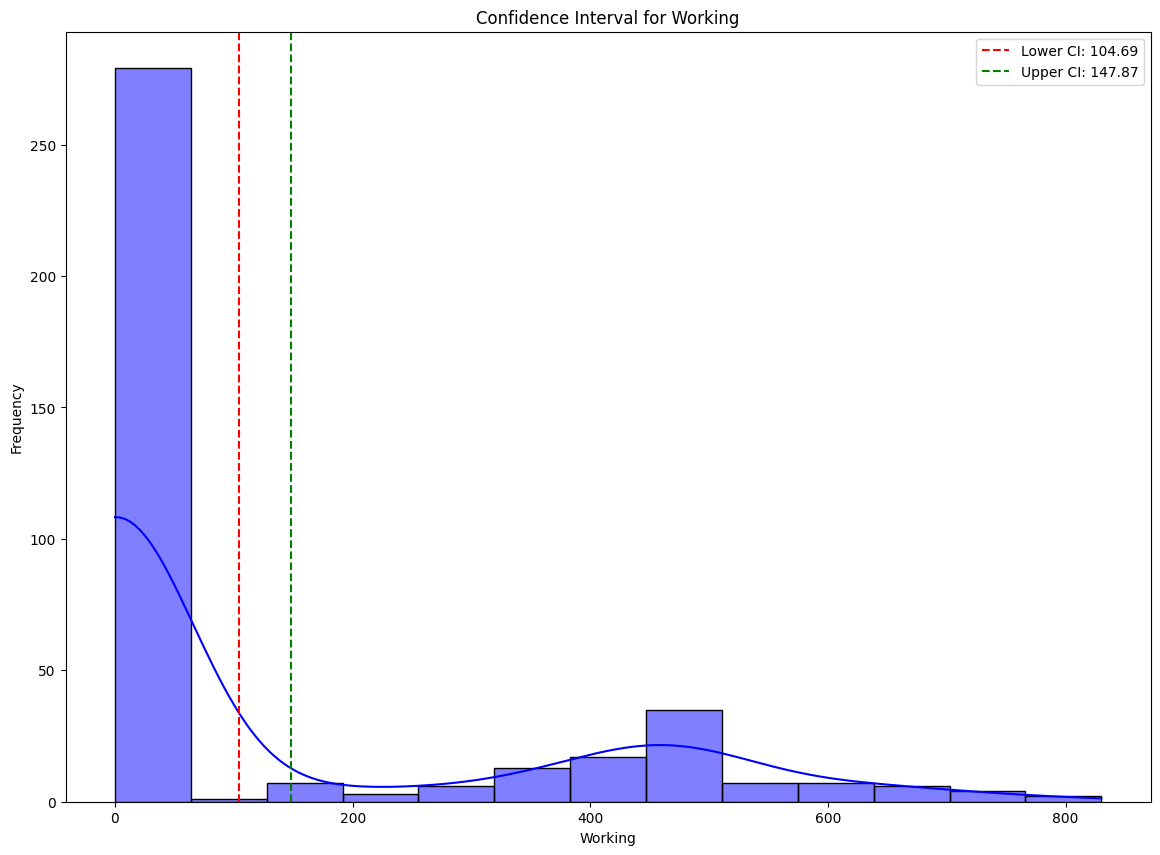

In [41]:
def confidence_interval(data, confidence=0.95):
    data = data.dropna()
    mean = np.mean(data)
    std_error = stats.sem(data)
    margin_of_error = std_error * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin_of_error, mean + margin_of_error

lower, upper = confidence_interval(final_df['Working'])
print(f"Confidence Interval for Working: ({lower:.2f}, {upper:.2f})")

# Visualize confidence interval with a plot
plt.figure(figsize=(14, 10))
sns.histplot(final_df['Working'].dropna(), kde=True, color='blue')
plt.axvline(x=lower, color='red', linestyle='--', label=f'Lower CI: {lower:.2f}')
plt.axvline(x=upper, color='green', linestyle='--', label=f'Upper CI: {upper:.2f}')
plt.title('Confidence Interval for Working')
plt.xlabel('Working')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Step 3.4: Chi-Squared Test for Categorical Variables

##### Perform Chi-squared test between Sex and Sport_Event and visualizing the contingency table.

Chi-squared Test: Chi2 stat=12.18, p-value=0.00
There is a significant association between 'Sex' and 'Sport_Event'.


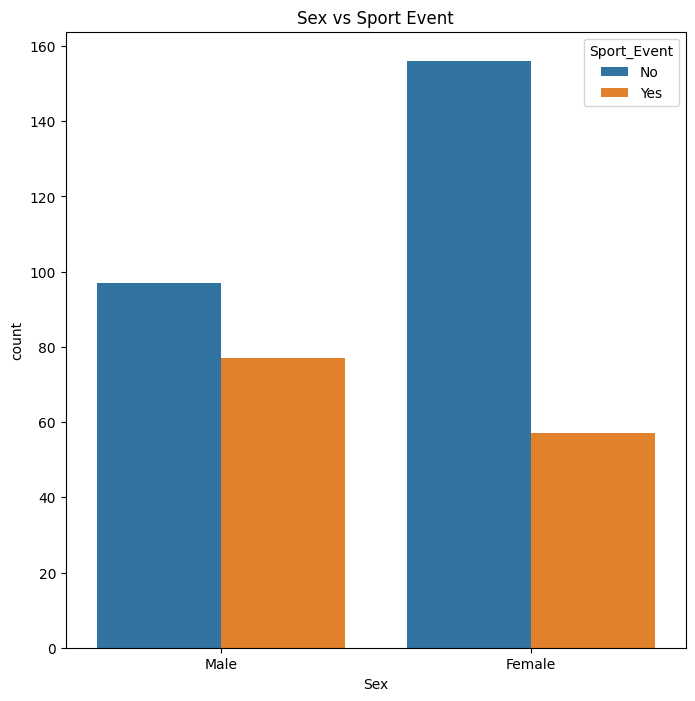

In [42]:
contingency_table = pd.crosstab(final_df['Sex'], final_df['Sport_Event'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 stat={chi2_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant association between 'Sex' and 'Sport_Event'.")
else:
    print("There is no significant association between 'Sex' and 'Sport_Event'.")

plt.figure(figsize=(8, 8))
sns.countplot(x='Sex', hue='Sport_Event', data=final_df)
plt.title('Sex vs Sport Event')
plt.show()

##### Performing Chi-squared test between Living_Evironment and  and visualizing the contingency table.

Chi-squared Test: Chi2 stat=2.10, p-value=0.35
There is no significant association between 'Living_Environment' and 'Theater'.


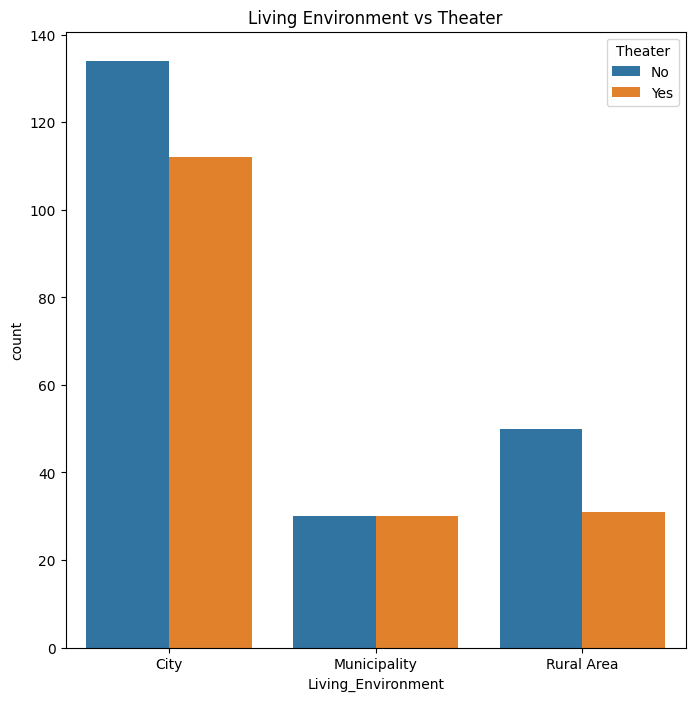

In [43]:
# Chi-squared test between 'Living_Evironment' vs 'Theater'
contingency_table = pd.crosstab(final_df['Living_Environment'], final_df['Theater'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 stat={chi2_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant association between 'Living_Environment' and 'Theater'.")
else:
    print("There is no significant association between 'Living_Environment' and 'Theater'.")

# Visualize the contingency table using a heatmap
plt.figure(figsize=(8, 8))
sns.countplot(x='Living_Environment', hue='Theater', data=final_df)
plt.title('Living Environment vs Theater')
plt.show()

#### Step 3.5: Kruskal-Wallis Test

##### Performing Kruskal-Wallis test when the data is not normally distributed and visualizing the results.

Kruskal-Wallis Test between Age_Group and Living_Environment: H-stat=1.14, p-value=0.56
There is no significant difference between Age Groups across Living Environments.


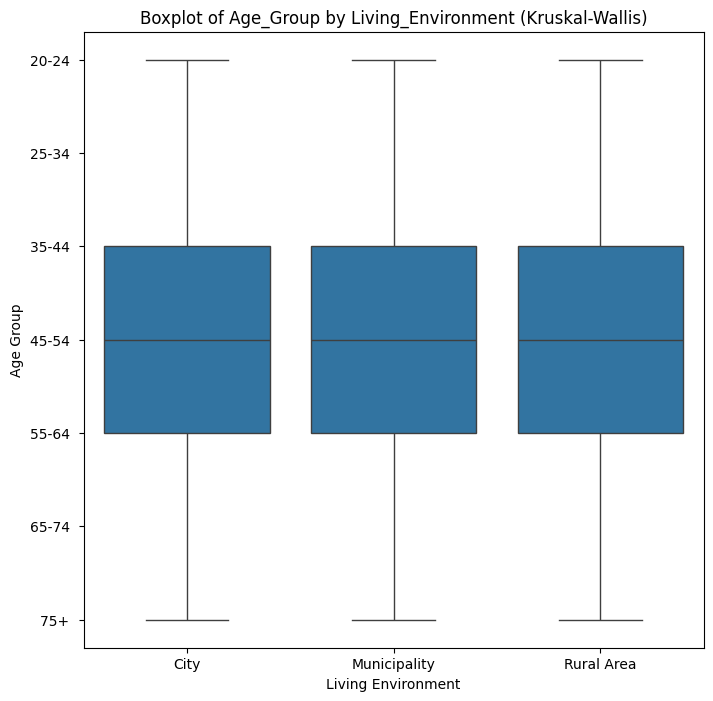

In [44]:
# Kruskal-Wallis test between Age_Group and Living_Environment
grouped = [final_df[final_df['Living_Environment'] == group]['Age_Group'].dropna() for group in final_df['Living_Environment'].unique()]
h_stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test between Age_Group and Living_Environment: H-stat={h_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant difference between Age Groups across Living Environments.")
else:
    print("There is no significant difference between Age Groups across Living Environments.")

# Visualize the Kruskal-Wallis groups with a boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(x='Living_Environment', y='Age_Group', data=final_df)
plt.title('Boxplot of Age_Group by Living_Environment (Kruskal-Wallis)')
plt.xlabel('Living Environment')
plt.ylabel('Age Group')
plt.show()